In [13]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

## 2 Deep Learning [35 points]

(1) (6 pts) Compute the input and the output of units 4, 5 and 6 (i.e., I4, I5, I6, O4, O5, O6);

In [142]:
x1, x2, x3 = 1, 0, 1 
w14, w15, w24, w25, w34, w35, w46, w56 = 0.6, 0.3, 0.4, 0.1, -0.3, 0.2, 0.3, 0.7 
b4, b5, b6 = -0.2, 0.3, -0.1

In [143]:
def ReLU(x):
    return max(0, x)

def dReLU(x):
    if x > 0:
        return 1
    else:
        return 0

In [144]:
I4 = x1*w14+x2*w24+x3*w34+b4
I5 = x1*w15+x2*w25+x3*w35+b5
O4 = ReLU(I4)
O5 = ReLU(I5)

I6 = O4*w46+O5*w56+b6
O6 = ReLU(I6)

In [145]:
print("I4 = ", I4)
print("I5 = ", I5)
print("O4 = ", O5)
print("O5 = ", O5)
print("I6 = ", I6)
print("O6 = ", O6)

I4 =  0.09999999999999998
I5 =  0.8
O4 =  0.8
O5 =  0.8
I6 =  0.49
O6 =  0.49


(2) (3 pts) Compute the error of units 4, 5 and 6 (i.e., δ4, δ5, δ6)

$δ_4 = \frac{\partial L}{\partial I_4}$

$=\frac{\partial L}{\partial O_6} \cdot 
\frac{\partial O_6}{\partial I_6} \cdot \frac{\partial I_6}{\partial O_4} \cdot \frac{\partial O_4}{\partial I_4}$

$=δ_6 \cdot dReLU(O_6) \cdot w_{46} \cdot dReLU(O_4)$

In [35]:
T = 0
delta6 = 1/2*(O6-T)**2
delta4 = delta6 * dReLU(O6) * w46 * dReLU(O4)
delta4 = delta6 * dReLU(O6) * w56 * dReLU(O5)

In [36]:
print("delta4 = ", delta4)
print("delta6 = ", delta6)
print("delta4 = ", delta4)

delta4 =  0.08403499999999998
delta6 =  0.12004999999999999
delta4 =  0.08403499999999998


(3) (2 pts) Let the learning rate η = 0.1, compute the new weights, w15 and w46, after
one-step update.

$w_{ij} = w_{ij} -η \cdot δ_j O_i$

$δ_1 = δ_4 w_{14}$

$w_{15} = w_{15} -η \cdot δ_1 O_5$

$w_{46} = w_{46} -η \cdot δ_4 O_6$

In [37]:
delta1 = delta4 * w14 
w15 -= 0.1 * delta1 * O5
w46 -= 0.1 * delta4 * O6


In [38]:
print("w15 = ", w15)
print("w46 = ", w46)

w15 =  0.29596632
w46 =  0.29588228499999997


## 3 Anomaly & Outlier Detection [15 points]

### (a) (4 pts)

In [146]:
import numpy as np
X = np.array([16.7, 16.1, 16.8, 16.9, 11.8, 16.9, 16.6, 16.8, 17.6, 16.3, 17.2])

In [148]:
mu = np.mean(X)
sigma = np.std(X)
z = abs(X - mu)/sigma
z

array([0.24493367, 0.15920688, 0.31229042, 0.37964718, 3.05554749,
       0.37964718, 0.17757691, 0.31229042, 0.85114449, 0.02449337,
       0.58171746])

### (b) 

In [43]:
data = {}
data['A'] = np.array([1, 3])
data['B'] = np.array([3, 3])
data['C'] = np.array([2, 2])
data['D'] = np.array([1, 1])
data['E'] = np.array([4, 1])
data['F'] = np.array([2, -2]) 
data['G'] = np.array([-2, 1])

X = []
for item in data:
    X.append(list(data[item]))
X = np.array(X)

In [55]:
def clacLrd(target, k):
    dist_dict = {}
    for item in data:
        dist = np.sum((data[target] - data[item])**2)
        dist_dict[item] = dist

    dist_k = sorted(dist_dict.values())[k]

    Nk = 0
    sum_of_reachdist = 0
    neighbor = []
    for item in dist_dict:
        if dist_dict[item] <= dist_k and dist_dict[item] != 0:
            Nk += 1
            dist_dict[item] = dist_k
            sum_of_reachdist += dist_dict[item]

    lrd = Nk/sum_of_reachdist   
    return lrd

In [58]:
def clacLOF(target, k): 
    dist_dict = {}
    for item in data:
        dist = np.sum((data[target] - data[item])**2)
        dist_dict[item] = dist

    dist_k = sorted(dist_dict.values())[3]

    Nk = 0
    sum_of_reachdist = 0
    neighbor_list = [] #
    for item in dist_dict:
        if dist_dict[item] <= dist_k and dist_dict[item] != 0:
            Nk += 1
            dist_dict[item] = dist_k
            sum_of_reachdist += dist_dict[item]
            neighbor_list.append(item) #

    lrd = Nk/sum_of_reachdist 

    sum_of_lrd_nu = 0 
    for neighbor in neighbor_list:
        lrd_nu = clacLrd(neighbor, k=3)/clacLrd(target, k=3)
        sum_of_lrd_nu += lrd_nu

    LOF = sum_of_lrd_nu/Nk
    return LOF

In [65]:
print('Lrd of B =', clacLrd('B', k=3))
print('Lrd of F =', clacLrd('F', k=3))
print('LOF of A =', clacLOF('A', k=3))
print('LOF of F =', clacLOF('F', k=3))

Lrd of B = 0.2
Lrd of F = 0.0625
LOF of A = 1.0999999999999999
LOF of F = 3.925925925925926


In [70]:
for letter in data:
    print('The LOF of', letter, '=', clacLOF(letter, k=3))

The LOF of A = 1.0999999999999999
The LOF of B = 1.4351851851851851
The LOF of C = 0.3833333333333333
The LOF of D = 2.533333333333333
The LOF of E = 2.475
The LOF of F = 3.925925925925926
The LOF of G = 4.958333333333333


In [187]:
def clacLOF(target, k):
    dist_dict = {}
    for item in data:
        dist = np.sum((data[target] - data[item])**2)
        dist_dict[item] = dist

    dist_k = sorted(dist_dict.values())[3]

    Nk = 0
    sum_of_reachdist = 0
    neighbor_list = [] #
    for item in dist_dict:
        if dist_dict[item] <= dist_k and dist_dict[item] != 0:
            Nk += 1
            dist_dict[item] = dist_k
            sum_of_reachdist += dist_dict[item]
            neighbor_list.append(item) #

    lrd = Nk/sum_of_reachdist 

    sum_of_lrd = 0 
    for neighbor in neighbor_list:
        lrd = clacLrd(neighbor, k=3)
        sum_of_lrd += lrd

    LOF = sum_of_reachdist * sum_of_lrd
    return LOF

In [188]:
print('Lrd of B =', clacLrd('B', k=3))
print('Lrd of F =', clacLrd('F', k=3))
print('LOF of A =', clacLOF('A', k=3))
print('LOF of F =', clacLOF('F', k=3))

Lrd of B = 0.2
Lrd of F = 0.0625
LOF of A = 9.899999999999999
LOF of F = 35.333333333333336


1.0999999999999999
1.4351851851851851
0.3833333333333333
2.533333333333333
2.475
3.925925925925926
4.958333333333333


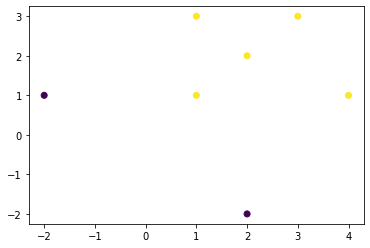

In [72]:
for letter in data:
    print(clacLOF(letter, k=3))

y = [1,1,1,1,1, -1, -1]
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## 4 Graph Connectivity Optimization [20 points]

### (a)

In [117]:
beta = 0.2
sigma = 0.1
n = 5
p0 = np.array([0.5] * n)

In [118]:
neighbor_dict = {
    0: [1, 4],
    1: [0, 3, 4],
    2: [3, 4],
    3: [1, 2, 4],
    4: [0, 1, 2, 3]
}

In [110]:
non_infection_prob = np.array([0.00] * n)

for node in neighbor_dict:
    neighbor_idx = neighbor_dict[node]
    non_infection_prob[node] = np.prod(p0[neighbor_idx]*(1-beta) + (1-p0[neighbor_idx]))

In [111]:
non_infection_prob

array([0.81  , 0.729 , 0.81  , 0.729 , 0.6561])

In [112]:
p1 = 1 - (sigma * p0 + (1 - p0) * non_infection_prob)

In [113]:
p1

array([0.545  , 0.5855 , 0.545  , 0.5855 , 0.62195])

### (b) 

In [116]:
avg_infec_prob = np.mean(p1)
avg_infec_prob

0.5765899999999999

In [134]:
def getP1AfterVaccine(neighbor_dict):
    n = 5
    p0 = np.array([0.5] * n)
    non_infection_prob = np.array([np.nan] * n)

    for node in neighbor_dict:
        neighbor_idx = neighbor_dict[node]
        non_infection_prob[node] = np.prod(p0[neighbor_idx]*(1-beta) + (1-p0[neighbor_idx]))

    p1 = 1 - (sigma * p0 + (1 - p0) * non_infection_prob)
    avg_infec_prob = np.nanmean(p1)
    return(avg_infec_prob)

In [135]:
neighbor_dict0 = {
    1: [3, 4],
    2: [3, 4],
    3: [1, 2, 4],
    4: [1, 2, 3]
}
getP1AfterVaccine(neighbor_dict0)

0.5652499999999999

In [136]:
neighbor_dict1 = {
    0: [4],
    2: [3, 4],
    3: [2, 4],
    4: [0, 2, 3]
}
getP1AfterVaccine(neighbor_dict1)

0.5438749999999999

In [137]:
neighbor_dict2 = {
    0: [1, 4],
    1: [0, 3, 4],
    3: [1, 4],
    4: [0, 1, 3]
}
getP1AfterVaccine(neighbor_dict2)

0.5652499999999999

In [138]:
neighbor_dict3 = {
    0: [1, 4],
    1: [0, 4],
    2: [4],
    4: [0, 1, 2]
}
getP1AfterVaccine(neighbor_dict3)

0.5438749999999999

In [139]:
neighbor_dict4 = {
    0: [1],
    1: [0, 3],
    2: [3],
    3: [1, 2],
}
getP1AfterVaccine(neighbor_dict4)

0.5225

## 5 Network Alignment [20 points]